<h1> Facial Keypoints Detection </h1>

In [ ]:
import pandas as pd
from pathlib import Path
data_dir = Path(r'C:\Users\VICTUS\Documents\Data-Science\.git\facial-keypoints-detection')
train_data = pd.read_csv(data_dir/'training/training.csv')
train_data.T.head()

,0,1,2,3,4,5,6,7,8,9,...,7039,7040,7041,7042,7043,7044,7045,7046,7047,7048
left_eye_center_x,66.033564,64.332936,65.057053,65.225739,66.725301,69.680748,64.131866,67.468893,65.80288,64.121231,...,69.229935,63.352951,65.711151,67.929319,66.867222,67.402546,66.1344,66.690732,70.965082,66.938311
left_eye_center_y,39.002274,34.970077,34.909642,37.261774,39.621261,39.968748,34.29004,39.413452,34.7552,36.740308,...,38.575634,35.671311,38.843545,35.846552,37.356855,31.842551,38.365501,36.845221,39.853666,43.42451
right_eye_center_x,30.227008,29.949277,30.903789,32.023096,32.24481,29.183551,29.578953,29.355961,27.47584,29.468923,...,29.407912,33.952078,32.268751,28.68782,30.750926,29.746749,30.478626,31.66642,30.543285,31.096059
right_eye_center_y,36.421678,33.448715,34.909642,37.261774,38.042032,37.563364,33.13804,39.621717,36.1856,38.390154,...,38.34545,40.816448,37.706043,41.452484,40.115743,38.632942,39.950198,39.685042,40.772339,39.528604
left_eye_inner_corner_x,59.582075,58.85617,59.412,60.003339,58.56589,62.864299,57.797154,59.554951,58.65216,58.620923,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


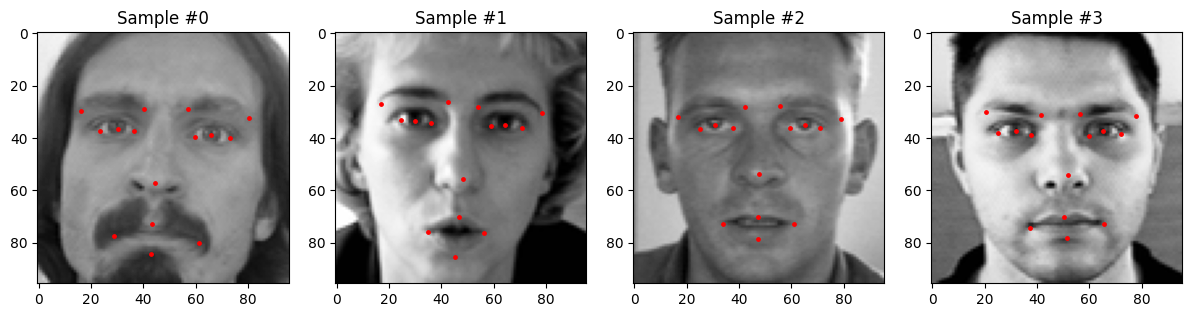

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
IMG_SIZE = 96 #image size 96 x 96 pixels

def show_keypoints(image, keypoints):
    plt.imshow(image, cmap='gray')
    if len(keypoints):
        plt.scatter(keypoints[:, 0], keypoints[:, 1], s=24, marker='.', color='red')

def show_images(df, indexes, ncols=5, figsize=(15,10), with_keypoints=True):
    plt.figure(figsize=figsize)
    nrows = len(indexes)//ncols + 1
    for i, idx in enumerate(indexes):
        image = np.fromstring(df.loc[idx, 'Image'], sep=' ').astype(np.float32).reshape(-1, IMG_SIZE)
        if with_keypoints:
            keypoints = df.loc[idx].drop('Image').values.astype(np.float32).reshape(-1,2)
        else:
            keypoints = []
        plt.subplot(nrows, ncols, i+1)
        plt.title(f"Sample #{idx}")
        plt.tight_layout()
        show_keypoints(image, keypoints)
    plt.show()

show_images(train_data, indexes=[0,1,2,3])

In [15]:
train_data.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [14]:
# Cleaning Data

train_df = train_data.dropna()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140 entries, 0 to 2283
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

<h2>Preprocessing Data </h2>

In [18]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms, utils

from torch import nn, optim
import torch.nn.functional as func

In [19]:
class FaceKeypointsDataset(Dataset):
    def __init__(self, df, train=True, transform=None):
        self.df = df
        self.train = train
        self.transform = transform

    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        image = np.fromstring(self.df.loc[idx, 'Image'], sep=' ').astype(np.float32).reshape(-1, IMG_SIZE)
        if self.train:
            keypoints = self.df.loc[idx].drop('Image').values.astype(np.float32).reshape(-1,2)
        else:
            keypoints = None

        sample = {
            'image': image,
            'keypoints':keypoints
        }

        if self.transform:
            sample = self.transform(sample)
        return sample        

<h3>Transformations</h3>

In [22]:
class Normalize(object):
    def __call__(self, sample):
        image, keypoints = sample['image'], sample['keypoints']
        return {
            'image': image/255., #scale to [0,1]
            'keypoints':keypoints
        }
    
class ToTensor(object):
    def __call__(self, sample):
        image, keypoints = sample['image'], sample['keypoints']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C x H x W
        image = image.reshape(1, IMG_SIZE, IMG_SIZE)
        image = torch.from_numpy(image)

        if keypoints is not None:
            keypoints =  torch.from_numpy(keypoints)
            return {
                'image': image,
                'keypoints':keypoints
            }
        else:
            {
                'image': image
            }

class RandomHorizontalFlip(object):
    def __init__(self, p):
        self.p = p
        
    def __call__(self, sample):
        flip_indices = [
            (0,2),(1,3),(4,8),(5,9),(6,10),(7,11),(12,16),(13,17),(14,18),(15,19),(22,24),(23,25)
        ]
        image, keypoints = sample['image'], sample['keypoints']
        if np.random.random() < self.p:
            image = image[:, ::-1]
            if keypoints is not None:
                for a, b in flip_indices:
                    keypoints[a], keypoints[b] = keypoints[b], keypoints[a]
                keypoints[::2] = 96. - keypoints[::2] 
        return {
            'image': image,
            'keypoints':keypoints
        }

<h3>Splitting Training data into train and validation sets </h3>

In [23]:
def prepare_train_valid_loaders(trainset, valid_size=0.2, batch_size=128):
    # Obtain training index that will be used for validation
    num_train = len(trainset)
    indices = list(range(num_train))
    np.random.shuffle(indices)
    split = int(np.floor(valid_size * num_train))
    train_indx, valid_indx = indices[split:], indices[:split]

    # define samplers for obtaining training and validation batches
    train_sampler = SubsetRandomSampler(train_indx)
    valid_sampler = SubsetRandomSampler(valid_indx)

    # prepare data loaders  
    train_loader = DataLoader(trainset, batch_size=batch_size, sampler=train_sampler)
    valid_loader = DataLoader(trainset, batch_size=batch_size, sampler=valid_sampler)

    return train_loader, valid_loader

<h3>Construct Dataset and Dataloader</h3>

In [24]:
# define transform to augment the data

aug_transformations = transforms.Compose(
    [
        RandomHorizontalFlip(p=0.5),
        Normalize(),
        ToTensor()
    ]
)

# load training data
train_dataset = FaceKeypointsDataset(train_df, transform=aug_transformations)

# Prepare DataLoaders
batch_size = 32
valid_size = 0.3
train_loader, valid_loader = prepare_train_valid_loaders(train_dataset, valid_size, batch_size)